In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# We will use
1. Data Augmentation
2. Batch Normalisation 

## Architecture
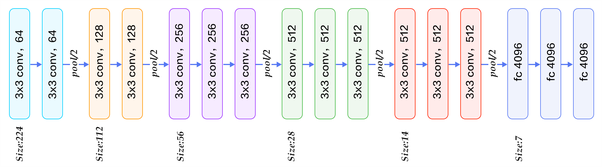

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. 

Here I will use Sequential model means that all the layers of the model will be arranged in sequence. Here I have imported ImageDataGenerator from keras.preprocessing. The objective of ImageDataGenerator is to import data with labels easily into the model. It is a very useful class as it has many function to rescale, rotate, zoom, flip etc. The most useful thing about this class is that it doesn’t affect the data stored on the disk. This class alters the data on the go while passing it to the model.

We will also use **padding='same'** this is because without same padding the image is going to shrink after each convolution which will eventually make the image too small to do this many convolutions.  
**Dropout** in conv2D part didn't have much change in the model


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
%%time
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

CPU times: user 760 ms, sys: 794 ms, total: 1.55 s
Wall time: 2.97 s


2021-10-26 18:02:02.625962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 18:02:02.720335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 18:02:02.721434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 18:02:02.723048: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
%%time
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CPU times: user 11.8 ms, sys: 1.91 ms, total: 13.7 ms
Wall time: 13.8 ms


In [7]:
%%time
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

2021-10-26 18:02:36.631696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-10-26 18:02:38.852574: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 21s 8ms/step - loss: 1.3002 - accuracy: 0.5536 - val_loss: 0.9324 - val_accuracy: 0.6751
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8494 - accuracy: 0.7067 - val_loss: 0.9009 - val_accuracy: 0.6838
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6919 - accuracy: 0.7615 - val_loss: 0.6978 - val_accuracy: 0.7598
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5795 - accuracy: 0.7993 - val_loss: 0.6736 - val_accuracy: 0.7801
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4926 - accuracy: 0.8305 - val_loss: 0.6208 - val_accuracy: 0.8009
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4186 - accuracy: 0.8558 - val_loss: 0.6562 - val_accuracy: 0.7894
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3513 - accuracy: 0.8781 - val_loss: 0.6161 - val_accuracy: 0.8

In [8]:
%%time
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
## this is valid for keras, if u call fit after training the data, then u are stating with already trained weights

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 40s 25ms/step - loss: 0.5442 - accuracy: 0.8271 - val_loss: 0.5656 - val_accuracy: 0.8176
Epoch 2/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4340 - accuracy: 0.8568 - val_loss: 0.4585 - val_accuracy: 0.8508
Epoch 3/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4038 - accuracy: 0.8666 - val_loss: 0.5379 - val_accuracy: 0.8368
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3816 - accuracy: 0.8743 - val_loss: 0.4562 - val_accuracy: 0.8511
Epoch 5/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3625 - accuracy: 0.8790 - val_loss: 0.4562 - val_accuracy: 0.8533
Epoch 6/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.3518 - accuracy: 0.8825 - val_loss: 0.4898 - val_accuracy: 0.8416
Epoch 7/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.3354 - accuracy: 0.8873 - val_loss: 0.4402 -

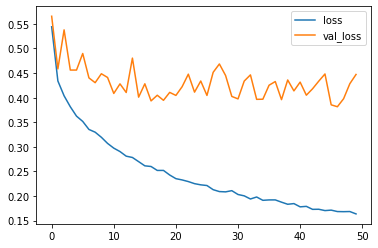

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

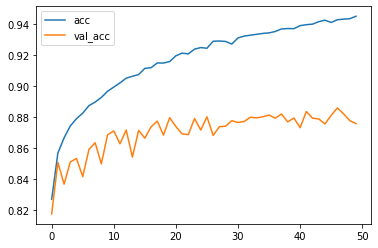

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Model seems to be **overfitted** as acc > val_acc and loss< val_loss
as the difference between val_acc and acc is quite high  
however there is **1% increase in val_acc** when we perform **data augmentation**

In [24]:
# label mapping
label_mapping = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Confusion matrix, without normalization
[[891   7  38   9   5   0   7   2  20  21]
 [  6 949   1   3   1   0   1   1   1  37]
 [ 16   2 859  19  30  13  54   3   2   2]
 [ 12   4  41 757  30  53  87   9   2   5]
 [  4   0  44  25 845  10  56  16   0   0]
 [  4   1  34 124  20 762  45   8   0   2]
 [  3   0  20  10   3   3 956   2   3   0]
 [  9   0  17  31  28  18  13 881   1   2]
 [ 37   5   6   3   2   0  12   0 914  21]
 [  8  36   2   4   0   1   2   1   2 944]]


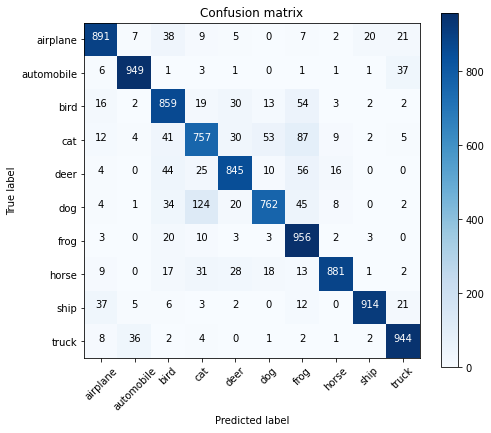

In [31]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(label_mapping))
  plt.xticks(tick_marks, label_mapping, rotation=45)
  plt.yticks(tick_marks, label_mapping)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(7,6))
plot_confusion_matrix(cm, list(range(10)))



### Top 5 mistakes by CNN Network
A Dog is mistaken by cat    - 124 times  
A cat is mistaken by frog   - 87 times  
A deer is mistaken by frog  - 56 times  
A bird is mistaken by frog  - 54 times  
A cat is mistaken by dog    - 53 times  

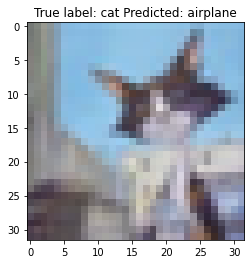

In [45]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [51]:
### storing 1st 100 mis classified images in j 
misclassified_idx = np.where(p_test != y_test)[0]
j = misclassified_idx
j[:100]

array([ 12,  32,  35,  47,  52,  57,  58,  59,  61,  85,  87, 106, 112,
       125, 128, 147, 155, 158, 164, 178, 188, 192, 215, 226, 228, 232,
       237, 245, 258, 263, 264, 265, 277, 308, 309, 312, 313, 332, 340,
       355, 367, 370, 378, 384, 385, 405, 422, 426, 428, 430, 433, 436,
       439, 441, 456, 464, 468, 483, 485, 488, 518, 531, 598, 606, 615,
       618, 631, 637, 639, 642, 661, 665, 672, 680, 682, 683, 685, 689,
       690, 710, 711, 715, 727, 730, 735, 739, 744, 751, 767, 770, 771,
       773, 779, 796, 799, 810, 811, 836, 845, 853])

CPU times: user 1min 15s, sys: 269 ms, total: 1min 16s
Wall time: 1min 16s


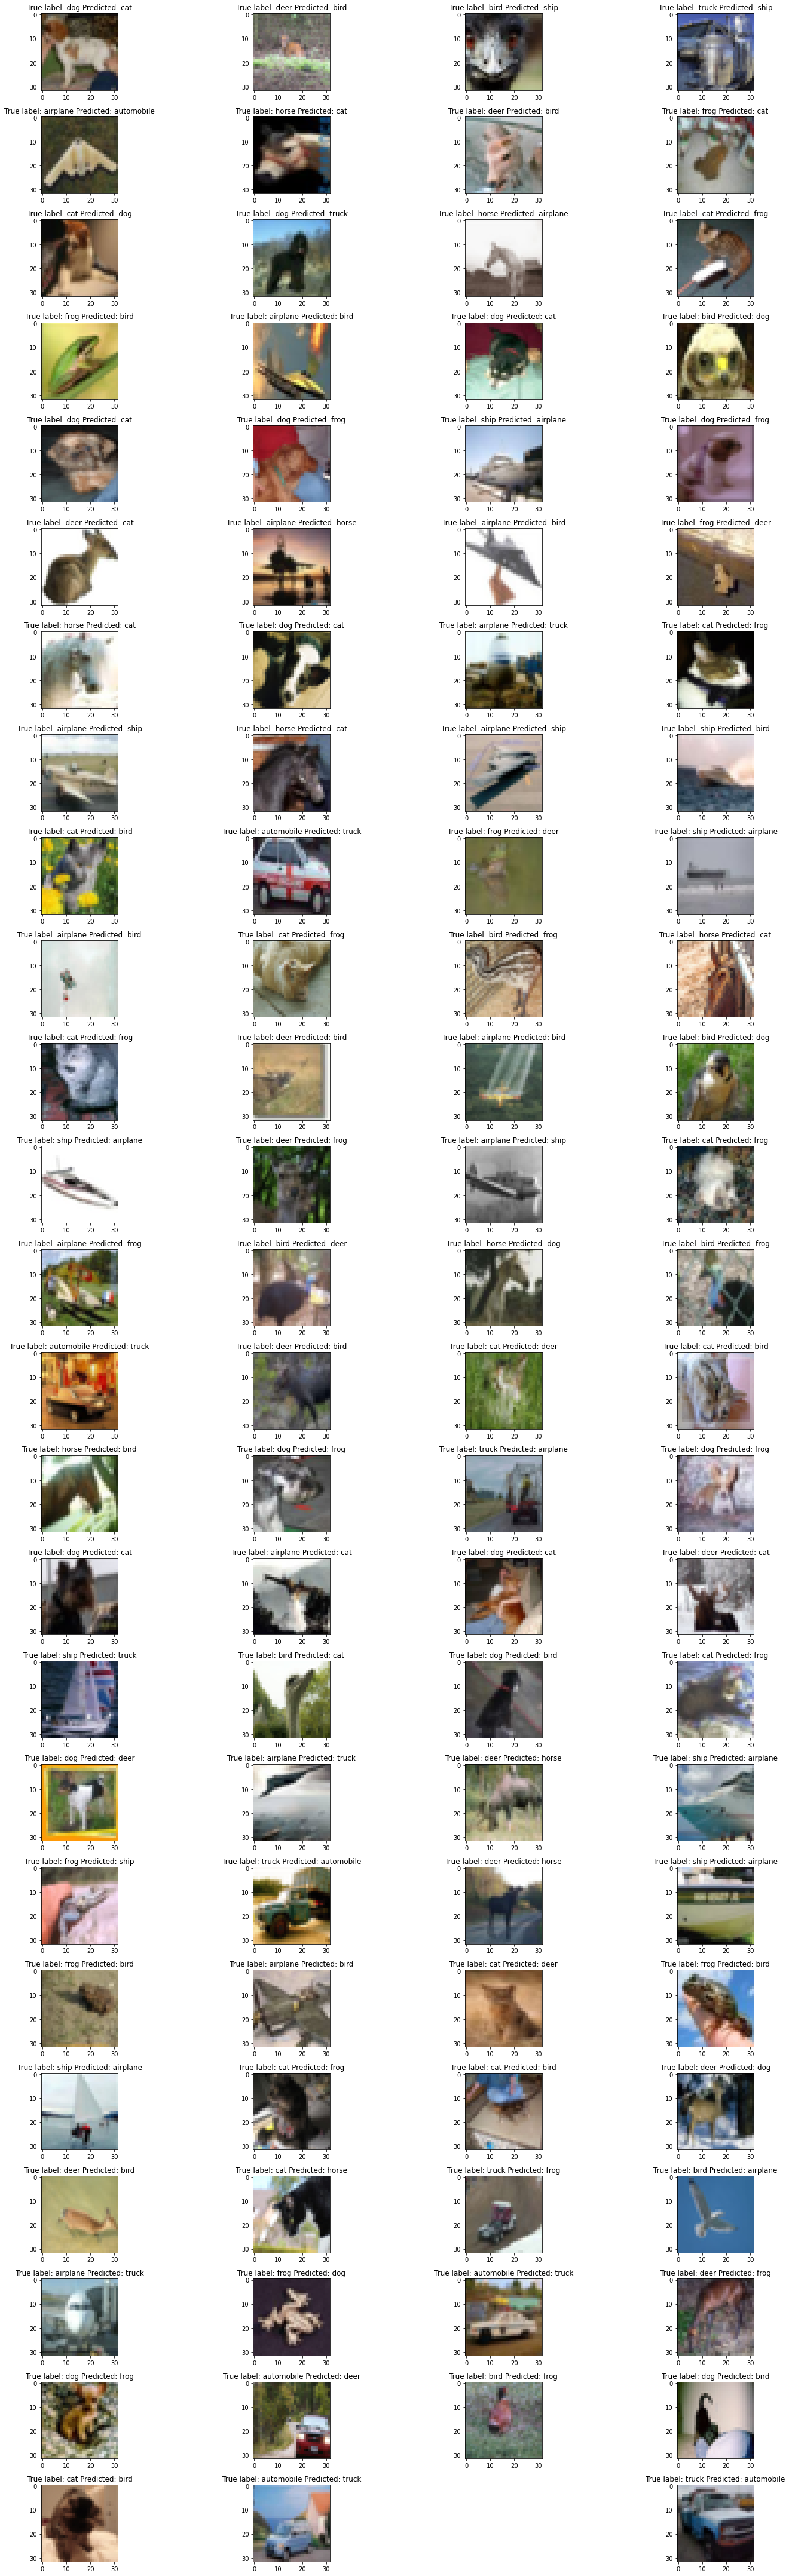

In [52]:
%%time
plt.figure(figsize=(22,60))
k=1
for i in j[:100]:
    plt.subplot(25,4,k)
    misclassified_idx = np.where(p_test != y_test)[0]
    plt.imshow(x_test[i], cmap='gray')
    plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
    plt.tight_layout()
    k=k+1


## I think there is room for improvment, as there are few images which I could eaisly identify to its correct class.

In [14]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

# [Further reading for Function API]('https://keras.io/guides/functional_api/')
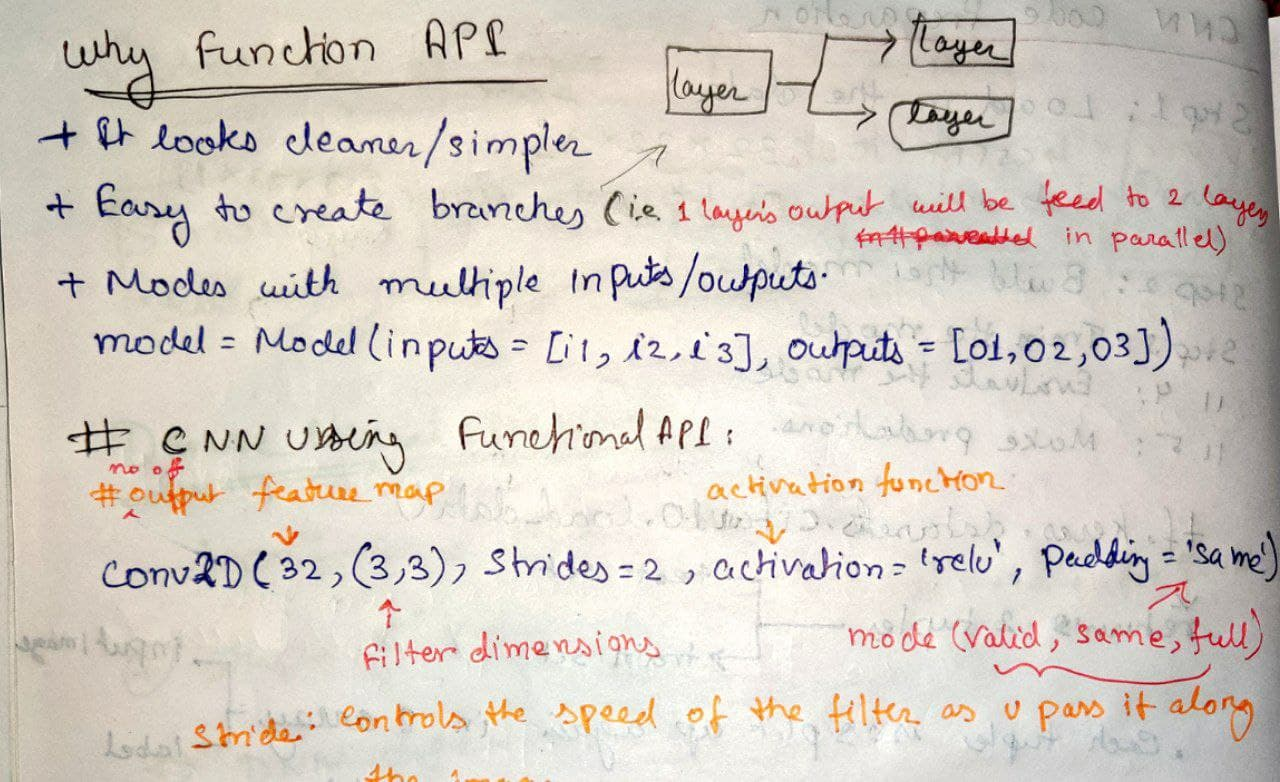

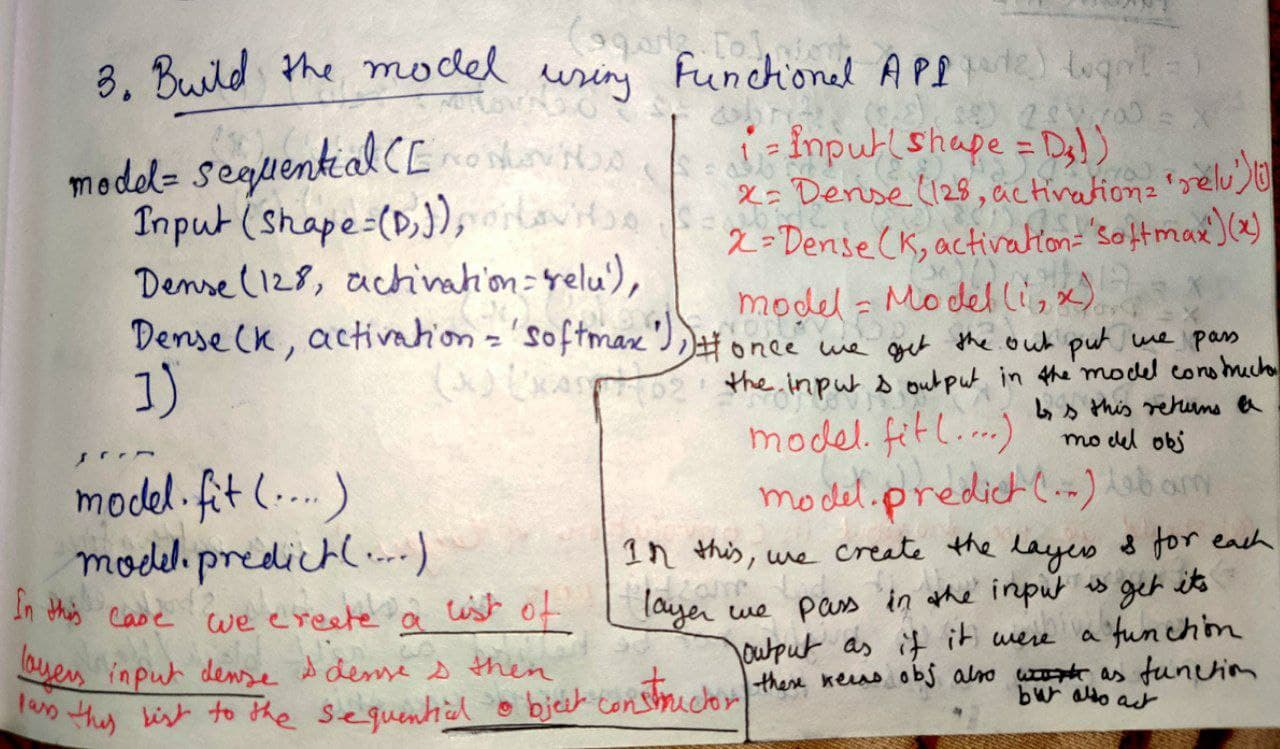
